# ACP et aide à l’interprétation
## 1. Importation des données actives

Dans un premier temps, nous importons le tableau des individus et variables actifs X (xij ; i =
1,…,n, nombre d’observations ; j = 1,…,p, nombre de variables) pour la construction des axes
factoriels

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
X = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=0,header=0,index_col=0)

In [50]:
#dimension
print(X.shape) # (18, 6)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage des données
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9295       1769     83   440   165   1095    165
Op

## 2. Préparation des données
Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée avec PCA.
Nous utilisons la classe StandardScaler pour ce faire. 

In [51]:
#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [52]:
#moyenne
print(np.mean(Z,axis=0))

#écart-type
print(np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
[1. 1. 1. 1. 1. 1.]


## 3. Analyse en composantes principales avec PCA de scikit-learn

In [53]:
#instanciation
acp = PCA(svd_solver='full')

In [54]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


Le paramètre (svd_solver = ‘full’) indique l’algorithme utilisé pour la décomposition en
valeurs singulières. 

Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par
défaut pour l’appréhension des bases de taille réduite. 

D’autres approches sont disponibles pour le traitement des grands ensembles de données. 

Le nombre de composantes (K) n’étant pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = p)

In [55]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_) # 6

6


In [56]:
#variance expliquée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [57]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La première composante accapare 73.68% de l’information disponible. Il y a un fort 'effet
taille’ dans nos données. Nous disposons de 87.94% avec les deux premiers
facteurs. Les suivants semblent anecdotiques.

Nous disposons des éléments permettant de construire le graphique 'Scree plot' (éboulis des
valeurs propres).

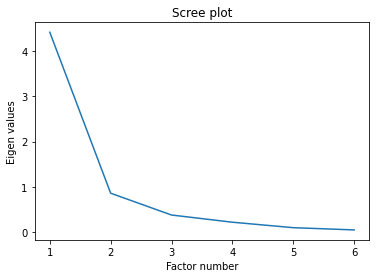

In [58]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être
intéressant également.

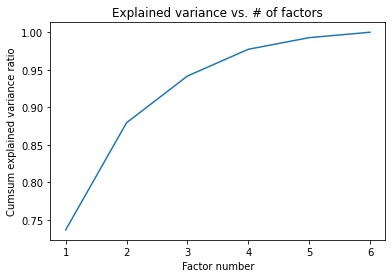

In [59]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## 4. Détermination du nombre de facteur à retenir

Les 'cassures' dans les graphiques ci-dessus sont souvent évoquées (règle du coude) pour identifier le nombre de facteurs K* à retenir. 

La solution (K* = 2) semble s’imposer ici.

D’autres pistes existent pour répondre à cette question toujours délicate qui conditionne
l’interprétation de l’ACP, notamment le « test des bâtons brisés ».

In [60]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

Puis affichons conjointement les valeurs propres et les seuils :


In [61]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


Avec cette procédure, seul le premier facteur est valide. 

Le cercle des corrélations que nous construirons par la suite semble aller dans le même sens.

Néanmoins, nous choisissons K* = 2 pour pouvoir représenter les individus et les variables dans le plan.

## 5. Représentation des individus – Outils pour l’interprétation

### 5.1 Coordonnées factorielles. 

Les coordonnées factorielles des individus ont été collectées dans la variable coord. 

Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les véhicules

NB : Les outils graphiques calculent souvent automatiquement les échelles en fonction des
plages de valeurs. 

Ce n’est pas une bonne idée en ce qui concerne l’ACP. 

En effet, les axes n’ont pas la même importance (% de variance restituée). 

Pour ne pas fausser la perception des proximités, il est très important de veiller à ce que les échelles soient
identiques en abscisse et en ordonnée. 

Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes. 

Nous nous rendons compte directement dans notre graphique que les dispersions des individus sont nettement plus
marquées sur le premier axe, en abscisse.

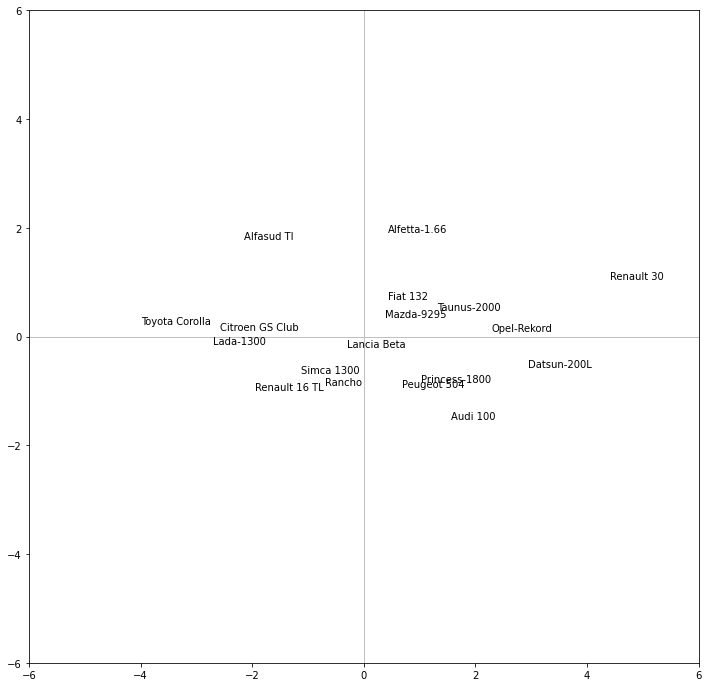

In [62]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

## 5.2 Qualité de représentation – Les COS² (cosinus carré). 

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

In [63]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


Concrètement, la Renault 30 et la Toyota Corolla sont les deux véhicules qui se démarquent
le plus des autres, et on les retrouve aux deux extrémités du premier axe factoriel qui porte
73.68% de l’information disponible 

In [64]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9295  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


Conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des
facteurs est égale à 1.

In [65]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 5.3 Contribution des individus aux axes (CTR).

Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur

In [66]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9295  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


Sans surprises, ce sont la Renault 30 et la Toyota Corolla qui sont déterminants pour le
premier axe ; 

pour le second, nous avons l’Alfetta-1.66, l’Alfasud TI et l’Audi 100.

Les sommes en ligne sont égales à l’unité ici :

In [67]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


## 2. Représentation des variables – Outils pour l’aide à l’interprétation

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ .components_.

In [68]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


Attention, les facteurs sont en ligne, les variables en colonne. 

Nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟𝑗𝑘) en les multipliant par la racine carrée des valeurs propres :

In [69]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l’on s’en tient spécifiquement aux deux premiers facteurs :

In [70]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V_MAX  0.754710  0.573519


Nous pouvons dessiner maintenant le cercle des corrélations

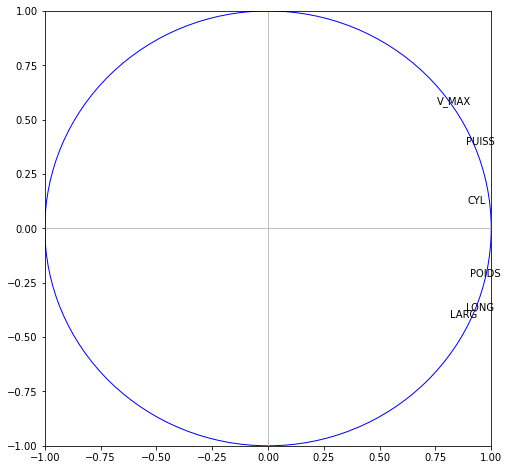

In [71]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On perçoit clairement l’effet taille sur le premier axe :

les voitures puissantes et rapides sont
aussi les plus lourdes et imposantes, la relation globale entre les variables est en réalité
déterminée par la cylindrée (CYL)

## 2.1 Qualité de représentation des variables (COS²). 

On peut calculer la qualité de
représentation des variables en montant la corrélation au carré.

In [72]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V_MAX  0.569588  0.328925


Contribution des variables aux axes (CTR). La contribution est également basée sur le
carré de la corrélation, mais relativisée par l’importance de l’axe

In [73]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
4  POIDS  0.185341  0.058892
5  V_MAX  0.128841  0.384230


In [74]:
#chargement des individus supplémentaires
indSupp = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=1,header=0,index_col=0)
print(indSupp)

                CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                              
Peugeot 604    2664    136   472   177   1410    180
Peugeot 304 S  1288     74   414   157    915    160


Nous devons centrer et réduire les variables des individus supplémentaires à l’aide des paramètres (moyennes et écarts-type) des données actives ayant servi à construire le repère
factoriel.

In [75]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


Il ne reste plus qu’à faire calculer par la fonction .transform() leurs coordonnées.

In [76]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


Et à les représenter dans le premier plan factoriel parmi les observations actives.

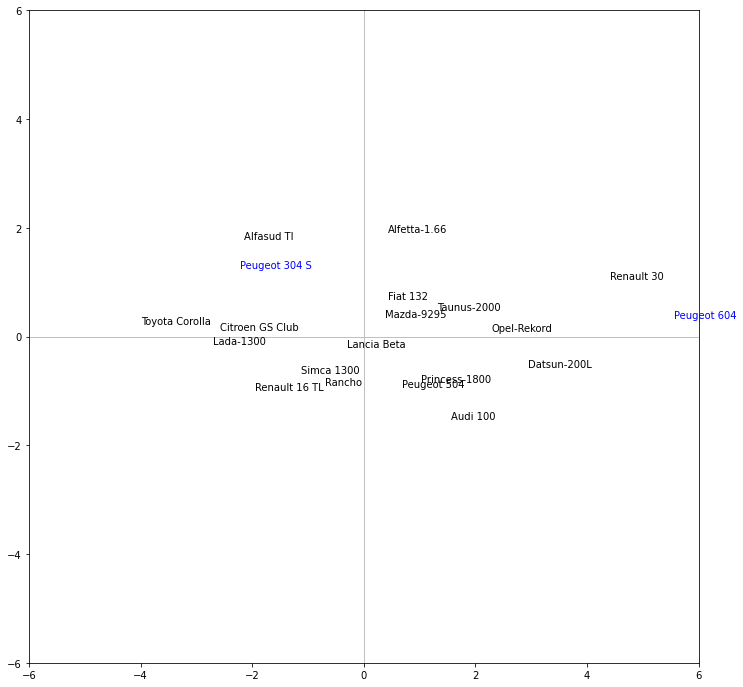

In [77]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#étiquette des points supplémentaires (illustratifs) en bleu ‘b’
for i in range(coordSupp.shape[0]):
 plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

La Peugeot 604 se rapproche plutôt de la Renault 30, la Peugeot 304 de l’Alfasud TI. Pour qui
connaît un peu les voitures de ces années-là, tout cela est parfaitement cohérent.

## 2.2 Variables supplémentaires

### importation des variables supplémentaires

In [78]:
#importation des variables supplémentaires
varSupp = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=2,header=0,index_col=0)
print(varSupp)

                  PRIX  R_POIDS_PUIS FINITION
Modele                                       
Alfasud TI       30570     11.012658      2_B
Audi 100         39990     13.058824     3_TB
Simca 1300       29600     15.441176      1_M
Citroen GS Club  28250     15.762712      1_M
Fiat 132         34900     11.275510      2_B
Lancia Beta      35480     13.170732     3_TB
Peugeot 504      32300     14.683544      2_B
Renault 16 TL    32000     18.363636      2_B
Renault 30       47700     10.312500     3_TB
Toyota Corolla   26540     14.818182      1_M
Alfetta-1.66     42395      9.724771     3_TB
Princess-1800    33990     14.146341      2_B
Datsun-200L      43980     11.913043     3_TB
Taunus-2000      35010     11.020408      2_B
Rancho           39450     14.112500     3_TB
Mazda-9295       27900     13.192771      1_M
Opel-Rekord      32700     11.200000      2_B
Lada-1300        22100     14.044118      1_M


### 2.2.1 Variables illustratives quantitatives

In [79]:
#variables supplémentaires quanti
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)

[[3.05700000e+04 1.10126582e+01]
 [3.99900000e+04 1.30588235e+01]
 [2.96000000e+04 1.54411765e+01]
 [2.82500000e+04 1.57627119e+01]
 [3.49000000e+04 1.12755102e+01]
 [3.54800000e+04 1.31707317e+01]
 [3.23000000e+04 1.46835443e+01]
 [3.20000000e+04 1.83636364e+01]
 [4.77000000e+04 1.03125000e+01]
 [2.65400000e+04 1.48181818e+01]
 [4.23950000e+04 9.72477064e+00]
 [3.39900000e+04 1.41463415e+01]
 [4.39800000e+04 1.19130435e+01]
 [3.50100000e+04 1.10204082e+01]
 [3.94500000e+04 1.41125000e+01]
 [2.79000000e+04 1.31927711e+01]
 [3.27000000e+04 1.12000000e+01]
 [2.21000000e+04 1.40441176e+01]]


In [81]:
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))
for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903888 -0.67254512 -0.15017616  0.21365718  0.10162791  0.28999742]]


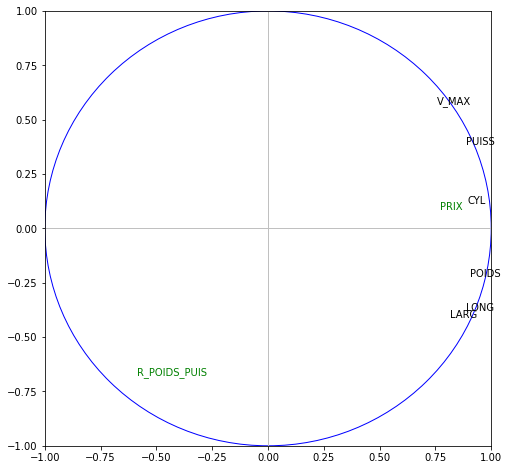

In [82]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#variables actives
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives
for j in range(vsQuanti.shape[1]):
 plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

On note dans ce cercle :
- La variable PRIX est globalement corrélée avec l’ensemble des variables, emportée par la
première composante principale.
- R_POIDS_PUIS (rapport poids-puissance) est quasi-orthogonale au premier facteur. 

A bien y regarder, on remarque surtout qu’elle est à l’opposé de V_MAX.

### 2.2.2 Variable illustrative qualitative
Nous isolons la variable illustrative qualitative dans une structure spécifique. Nous affichons la liste des valeurs.

In [83]:
#traitement de var. quali supplémentaire
vsQuali = varSupp.iloc[:,2]
print(vsQuali)

Modele
Alfasud TI          2_B
Audi 100           3_TB
Simca 1300          1_M
Citroen GS Club     1_M
Fiat 132            2_B
Lancia Beta        3_TB
Peugeot 504         2_B
Renault 16 TL       2_B
Renault 30         3_TB
Toyota Corolla      1_M
Alfetta-1.66       3_TB
Princess-1800       2_B
Datsun-200L        3_TB
Taunus-2000         2_B
Rancho             3_TB
Mazda-9295          1_M
Opel-Rekord         2_B
Lada-1300           1_M
Name: FINITION, dtype: object


Puis nous récupérons la liste des modalités.

In [84]:
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)

['1_M' '2_B' '3_TB']


Nous représentons les individus dans le plan factoriel, coloriées selon la modalité associée de
la variable illustrative. 

Il y a une petite gymnastique à faire pour obtenir le bon résultat.

J’imagine qu’il est possible de faire plus simple

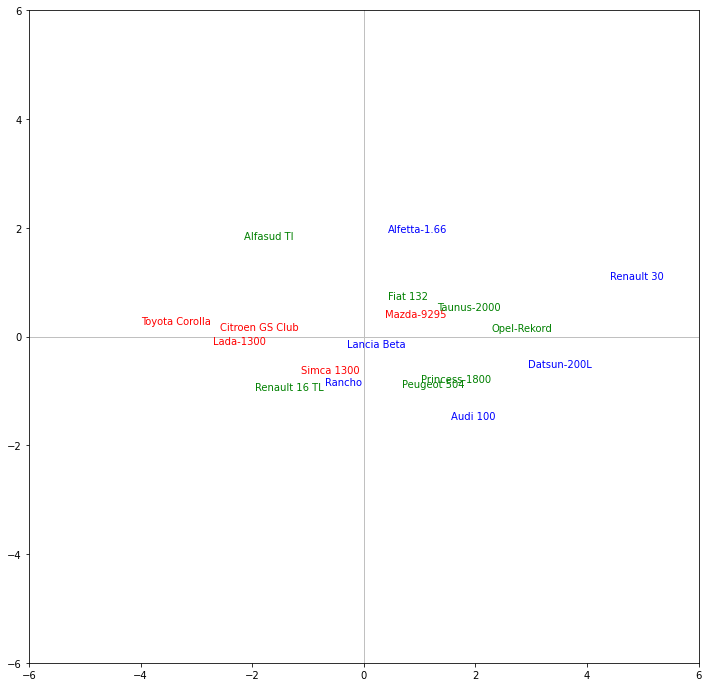

In [87]:
#liste des couleurs
couleurs = ['r','g','b']
#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Les couleurs sont définies par la variable couleurs qui est une liste avec les abréviations de


{‘r’ : rouge, ‘v’ : vert, ‘b’ : bleu} pour {1_M, 2_B, 3_TB}.

Puis nous calculons les positions des barycentres conditionnels dans le plan factoriel.

In [ ]:
#structure intermédiaire
df = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})
#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))